In [ ]:
# intakes a date
# groups segments of data?
# nahhh I think that displaying standard intervals into the prvious day and the next day sounds handy
# I never wake up after noon I think although this would be fun to check
# ngl noon to noon would give some pretty good context I think and then overlaying multiple days gets easier
# also this inital funtion will just graph one devices hypnograph


# testing with apple sleep

In [1]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHypnoDfParquet, regroupHypno
import pandas as pd

appleHypnoDF = getWorkingHypnoDfParquet("apple").drop(["creationDate", "sourceVersion"], axis=1)
appleHypnoDF['startDate'] = appleHypnoDF.index
appleHypnoDF

,endDate,value,startDate
startDate,,,
2022-10-01 00:42:59-07:00,2022-10-01 01:13:59-07:00,1,2022-10-01 00:42:59-07:00
2022-10-01 01:13:59-07:00,2022-10-01 01:29:59-07:00,2,2022-10-01 01:13:59-07:00
2022-10-01 01:29:59-07:00,2022-10-01 01:30:29-07:00,0,2022-10-01 01:29:59-07:00
2022-10-01 01:30:29-07:00,2022-10-01 01:43:29-07:00,1,2022-10-01 01:30:29-07:00
2022-10-01 01:43:29-07:00,2022-10-01 01:50:59-07:00,3,2022-10-01 01:43:29-07:00
...,...,...,...
2024-07-16 07:14:28-07:00,2024-07-16 07:14:58-07:00,0,2024-07-16 07:14:28-07:00
2024-07-16 07:14:58-07:00,2024-07-16 07:34:58-07:00,1,2024-07-16 07:14:58-07:00
2024-07-16 07:34:58-07:00,2024-07-16 07:36:28-07:00,0,2024-07-16 07:34:58-07:00


In [44]:
from datetime import datetime, date, time, timedelta
import pytz
import matplotlib.pyplot as plt
def graphHypnoDate(hypnoDf, forDate, deviceName, cutOffTime = time(12,0,0), timezone = 'US/Arizona'):
    graphTimeStart = pytz.timezone(timezone).localize(datetime.combine(forDate, cutOffTime))
    graphTimeEnd = graphTimeStart + timedelta(days=1)
    hypnoDfForDay = hypnoDf[(hypnoDf['startDate'] < graphTimeEnd) &
                            (hypnoDf['endDate'] > graphTimeStart)]

    print(hypnoDfForDay['startDate'].iloc[0])
    values = []
    times = []
    for rowIndex in range(len(hypnoDfForDay)):
        times.append(hypnoDfForDay.iloc[rowIndex]['startDate'])
        values.append(hypnoDfForDay.iloc[rowIndex]['value'])
        times.append(hypnoDfForDay.iloc[rowIndex]['endDate'])
        values.append(hypnoDfForDay.iloc[rowIndex]['value'])



    fig, ax = plt.subplots(figsize=(16.0, 4.0))

    plt.gca().set_title("Sleep Stages for " + deviceName + " for " + str(forDate))
    plt.gca().set_ylim([-1.3,3.3])
    plt.gca().set_xlim([graphTimeStart, graphTimeEnd])
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))


    legend1 = ax.plot(times, values, label=deviceName, alpha=1, linewidth=1)


    legend2 = [
        ax.axhline(y = -1, color = 'k', linestyle = ':', linewidth=.7, label = "No Data"),
        ax.axhline(y = 0, color = 'c', linestyle = ':', linewidth=.7, label = "Awake"),
        ax.axhline(y = 1, color = 'm', linestyle = ':', linewidth=.7, label = "Light"),
        ax.axhline(y = 2, color = 'r', linestyle = ':', linewidth=.7, label = "Deep"),
        ax.axhline(y = 3, color = 'b', linestyle = ':', linewidth=.7, label = "REM") 
    ]

    legendToAdd = ax.legend(loc="upper left", handles=legend1)
    plt.legend(loc="upper right", handles=legend2[::-1])

    ax.add_artist(legendToAdd)
    plt.ylabel("Sleep Stage")
    plt.xlabel("Time")
    plt.show()

In [45]:
appleDates = appleHypnoDF['startDate'].dt.date.unique()
print(len(appleDates))
appleDates[:10]

538


array([datetime.date(2022, 10, 1), datetime.date(2022, 10, 2),
       datetime.date(2022, 10, 3), datetime.date(2022, 10, 4),
       datetime.date(2022, 10, 5), datetime.date(2022, 10, 6),
       datetime.date(2022, 10, 7), datetime.date(2022, 10, 8),
       datetime.date(2022, 10, 9), datetime.date(2022, 10, 10)],
      dtype=object)

2022-10-04 09:02:05-07:00


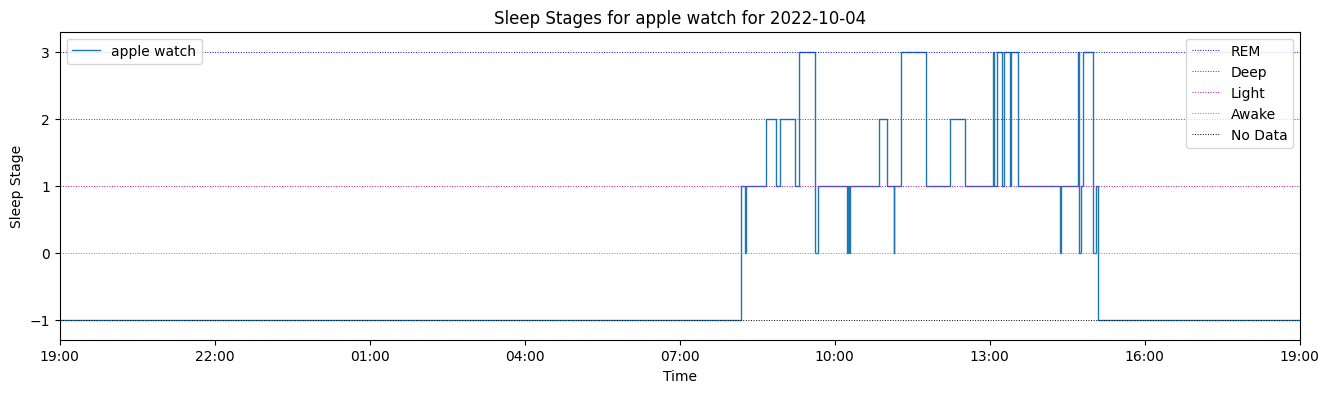

In [47]:
from datetime import date
graphHypnoDate(appleHypnoDF, date(2022, 10, 4), 'apple watch')